Nuha BinTayyash, 2020

This notebook shows the ROC and precision-recall curves resulted from running GPcounts with one sample test on simulated bulk RNA-seq datasets.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
from scipy import stats

In [2]:
DESeq2 = pd.read_csv('fission_DESeq2_ost_scaled.csv',index_col=[0])
print(DESeq2.shape)
GPcounts_NB = pd.read_csv('ll_Negative_binomial_wt_normalized_counts_scaled.csv',index_col=[0])
GPcounts_G = pd.read_csv('ll_Gaussian_wt_normalized_counts_scaled.csv',index_col=[0])
print(GPcounts_NB.shape)
print(GPcounts_G.shape)

(6459, 6)
(6459, 3)
(6459, 3)


In [3]:
DESeq_sorted = DESeq2.sort_values(by=['padj'])
DESeq_sorted

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
SPBC2F12.09c,194.538295,2.248903,0.566691,1823.877023,0.000000e+00,0.000000e+00
SPAC19D5.01,785.112441,0.512240,0.241933,1378.228045,7.183368e-296,2.319510e-292
SPBC365.12c,2777.157909,1.426321,0.172215,1311.252966,2.330119e-281,5.015969e-278
SPCPB16A4.07,2330.086616,1.293065,0.278453,1092.090662,6.901209e-234,1.114200e-230
SPBC21C3.19,3351.602947,2.746294,0.224419,990.070391,8.483585e-212,1.095740e-208
...,...,...,...,...,...,...
SPAC343.18,187.167361,-0.040546,0.208468,0.270930,9.981543e-01,9.986182e-01
SPCC777.15,76.219994,-0.006933,0.402207,0.229976,9.987569e-01,9.989116e-01
SPBC28F2.05c,153.393201,-0.101474,0.370839,0.230511,9.987499e-01,9.989116e-01
SPAC17G6.04c,679.685688,0.018728,0.141801,0.179090,9.993226e-01,9.993226e-01


In [4]:
GPcounts_NB_sorted = GPcounts_NB.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_NB_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
SPBC2F12.09c,-79.144427,-1508.343075,1429.198648
SPBC1105.13c,-97.509046,-793.386544,695.877498
SPAC19D5.01,-114.106587,-730.038451,615.931864
SPNCRNA.1165,-82.891869,-585.840036,502.948166
SPBC725.03,-109.598092,-575.352790,465.754698
...,...,...,...
SPBC4F6.18c,-178.918502,-160.914156,-18.004345
SPBC17A3.07,-167.903240,-149.083103,-18.820137
SPAC3H5.09c,-159.974767,-139.965044,-20.009723
SPRRNA.52,-232.812788,-206.035105,-26.777683


In [5]:
GPcounts_G_sorted = GPcounts_G.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_G_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
SPNCRNA.802,30.293759,10.194551,20.099209
SPAC14C4.03,29.720212,10.355327,19.364885
SPNCRNA.759,12.849684,13.445449,-1.368746
SPAC186.02c,2.912987,4.630847,-1.717860
SPAC2F7.06c,11.336875,12.926669,-1.763215
...,...,...,...
SPMITTRNAGLY.01,-14.146688,29.699381,-43.846070
SPRRNA.46,-12.834759,32.860853,-45.695612
SPNCRNA.98,-8.253948,37.566879,-45.820827
SPRRNA.01,-1.159685,44.992379,-46.152065


0.1
0.2560915761121116


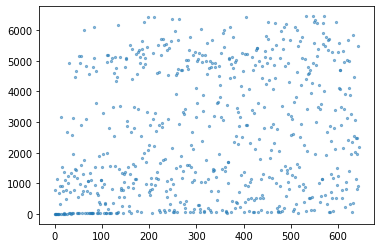

0.44015461540903944


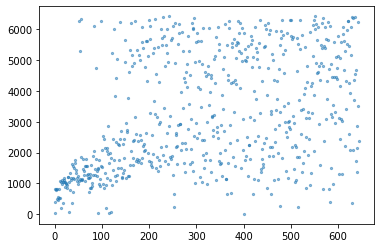

0.2
0.10412577334547862


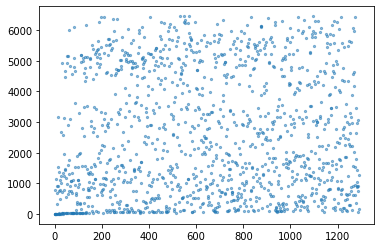

0.32190438866884113


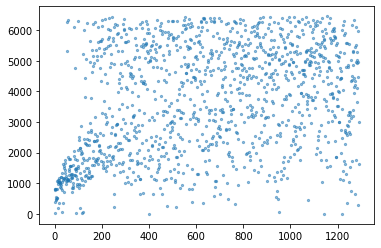

0.30000000000000004
0.13135977730884768


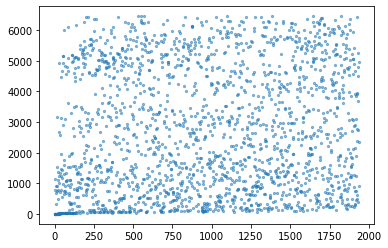

0.26775011973974194


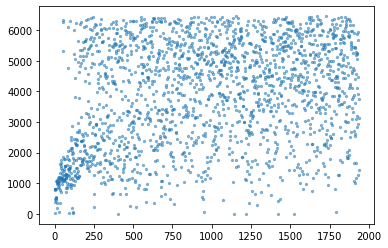

0.4
0.14179790207125112


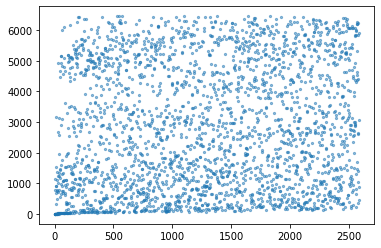

0.1986342352418715


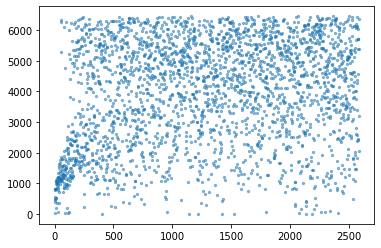

0.5
0.1544523806213232


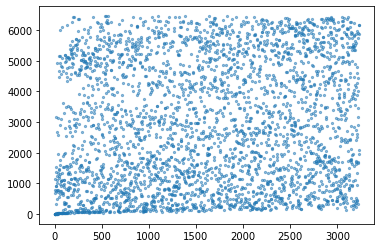

0.08446601918562166


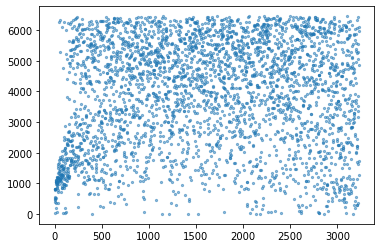

0.6000000000000001
0.15878805132058318


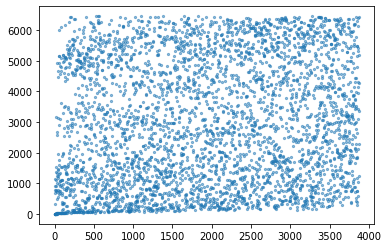

-0.040998292514001285


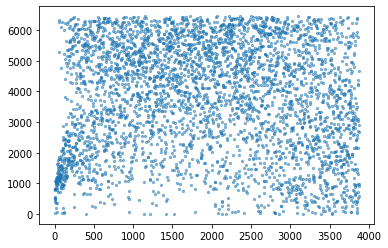

0.7000000000000001
0.158528552125817


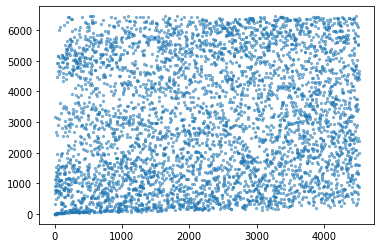

-0.13355239578437775


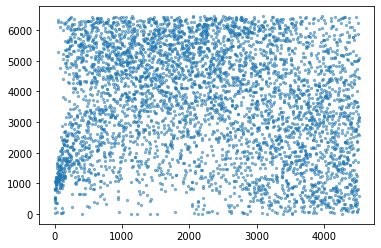

0.8
0.16943527642666623


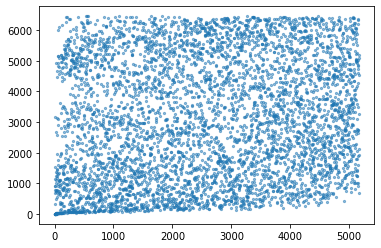

-0.2278244448218296


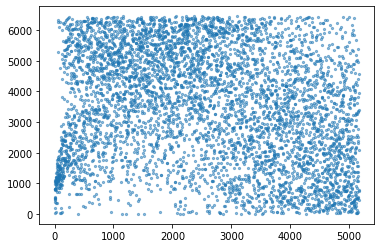

0.9
0.1859066766552572


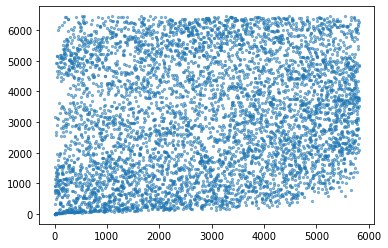

-0.28873962773346584


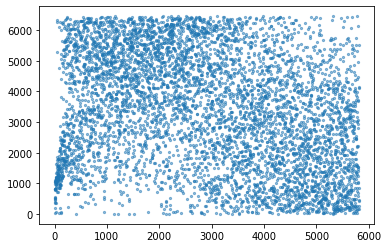

1.0
0.2142880359812184


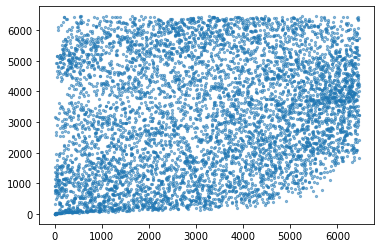

-0.34823935388505783


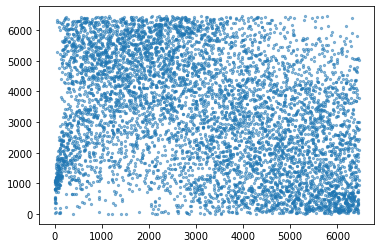

In [6]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10
DESeq_id = list(DESeq_sorted.index.values)
GPcounts_NB_id = list(GPcounts_NB_sorted.index)
GPcounts_G_id = list(GPcounts_G_sorted.index)
corr_NB = []
corr_G = []

for count in range(10):
    print(percentage[count])
    DESeq_id_part= DESeq_id[int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])]
    GPcounts_NB_index_part = []
    GPcounts_G_index_part = []
    for i in DESeq_id_part:
        GPcounts_NB_index_part.append(GPcounts_NB_id.index(i))
        GPcounts_G_index_part.append(GPcounts_G_id.index(i))
    
    DESeq_index_part = list(range(0,len(DESeq_id_part)))
    rho, pval = stats.spearmanr(DESeq_index_part,GPcounts_NB_index_part)
    print(rho)
    corr_NB.append(rho)
    plt.scatter(DESeq_index_part ,GPcounts_NB_index_part,s=5,alpha=0.5)
    plt.show() 
    
    rho, pval = stats.spearmanr(DESeq_index_part,GPcounts_G_index_part)
    print(rho)
    corr_G.append(rho)
    plt.scatter(DESeq_index_part ,GPcounts_G_index_part,s=5,alpha=0.5)
    plt.show() 
   

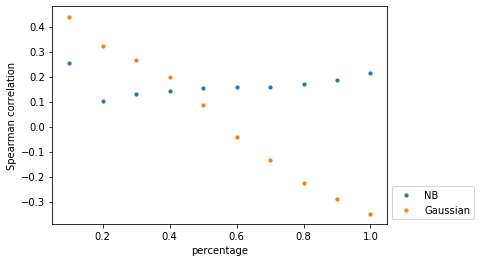

In [7]:
plt.scatter(percentage,corr_NB,s=10,label = 'NB')
plt.scatter(percentage,corr_G,s=10,label = 'Gaussian')
plt.xlabel('percentage')
plt.ylabel('Spearman correlation')
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1)